In [3]:
import sklearn as sk

import pandas as pd
import numpy as np
import matplotlib as plt

from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [11]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [12]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [16]:
boston_data = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [17]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(boston_data, boston.target, test_size = 0.3, random_state = 42)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
X_st_train = scaler.fit_transform(X_train)
X_st_test = scaler.fit_transform(X_test)

In [28]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [29]:
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(X_st_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
from matplotlib import pyplot as plt

<BarContainer object of 13 artists>

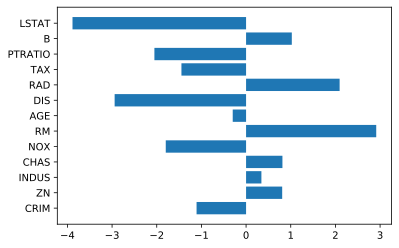

In [42]:
plt.barh(boston.feature_names, lr.coef_)

In [43]:
y_train_pred = lr.predict(X_st_train)

In [46]:
y_test_pred = lr.predict(X_st_test)

In [37]:
from sklearn.metrics import r2_score

In [47]:
print(f"R_train: {r2_score(y_train, y_train_pred)}; R_test: {r2_score(y_test, y_test_pred)}")

R_train: 0.7434997532004697; R_test: 0.6761000049033605


In [48]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rf = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [51]:
rf.fit(X_st_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [52]:
y_train_pred = rf.predict(X_st_train)

In [53]:
y_test_pred = rf.predict(X_st_test)

In [54]:
print(f"R_train: {r2_score(y_train, y_train_pred)}; R_test: {r2_score(y_test, y_test_pred)}")

R_train: 0.9783925294476489; R_test: 0.8531897513267789


In [60]:
print(RandomForestRegressor.__doc__)


    A random forest regressor.

    A random forest is a meta estimator that fits a number of classifying
    decision trees on various sub-samples of the dataset and uses averaging
    to improve the predictive accuracy and control over-fitting.
    The sub-sample size is always the same as the original
    input sample size but the samples are drawn with replacement if
    `bootstrap=True` (default).

    Read more in the :ref:`User Guide <forest>`.

    Parameters
    ----------
    n_estimators : integer, optional (default=10)
        The number of trees in the forest.

        .. versionchanged:: 0.22
           The default value of ``n_estimators`` changed from 10 to 100
           in 0.22.

    criterion : string, optional (default="mse")
        The function to measure the quality of a split. Supported criteria
        are "mse" for the mean squared error, which is equal to variance
        reduction as feature selection criterion, and "mae" for the mean
        absolute error

In [63]:
rf.feature_importances_

array([0.03211748, 0.00154999, 0.0070941 , 0.0011488 , 0.01436832,
       0.40270459, 0.01424477, 0.06403265, 0.00496762, 0.01169177,
       0.01808961, 0.0123114 , 0.41567892])

<BarContainer object of 13 artists>

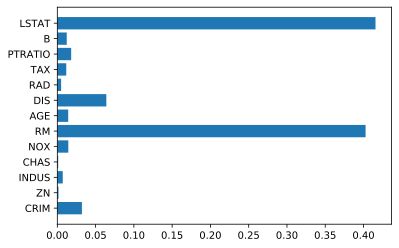

In [62]:
plt.barh(boston.feature_names, rf.feature_importances_)

In [105]:
fi_df = pd.DataFrame(rf.feature_importances_, index=boston.feature_names, columns=['fi'])
fi_df.sort_values(by='fi', ascending=False, inplace=True)
rf_fi_sum = np.sum(rf.feature_importances_)
rf_fi_first, rf_fi_second = fi_df.iloc[0], fi_df.iloc[1]

print(rf_fi_first.name)

LSTAT


In [109]:
print(f"Сумма вкладов признаков: {rf_fi_sum};\nНаиболее важный - {rf_fi_first.name}: {rf_fi_first.fi};\nВторой по важности - {rf_fi_second.name}: {rf_fi_second.fi}")

Сумма вкладов признаков: 0.9999999999999999;
Наиболее важный - LSTAT: 0.4156789214509943;
Второй по важности - RM: 0.402704591696731
